Read the dataset and inspect its columns and 5-point statistics

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df=pd.read_csv('advertising.csv',index_col=0)

In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Plot histograms with kde overlay to check the distribution of the predictors

/Users/evanokin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


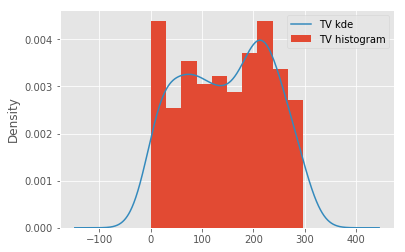

/Users/evanokin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


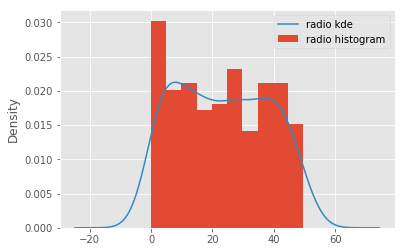

/Users/evanokin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


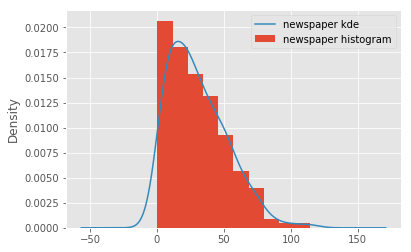

/Users/evanokin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


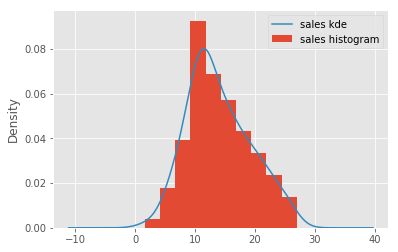

In [7]:
for column in df:
    df[column].plot.hist(normed=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Use scatterplots to plot each predictor against the target variable

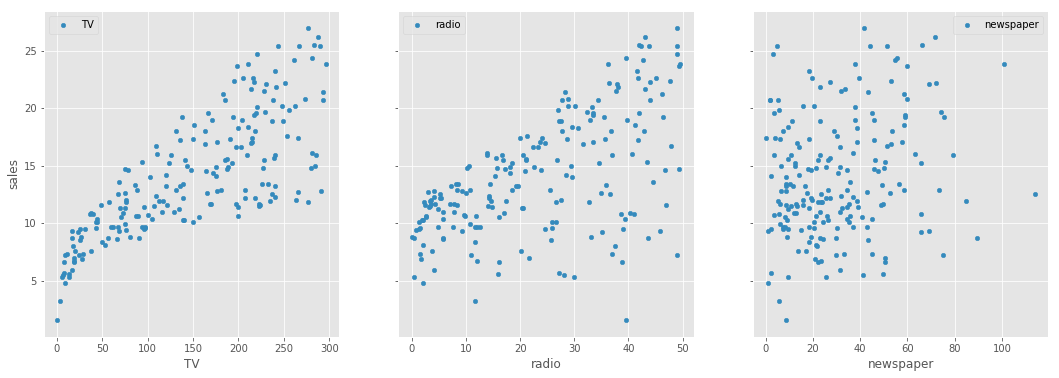

In [9]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['TV', 'radio', 'newspaper']):
    df.plot(kind='scatter', x=channel, y='sales', ax=axs[idx], label=channel)
plt.legend()
plt.show()

Run a simple regression in Statsmodels with TV as a predictor

In [10]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
# build the formula 
f = 'sales~TV'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        16:49:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

      TV
0    0.7
1  296.4
0     7.065869
1    21.122454
dtype: float64


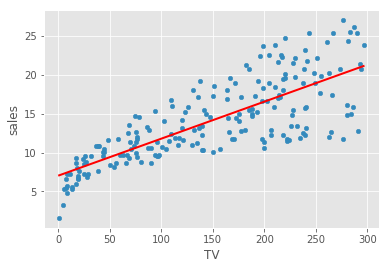

In [15]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

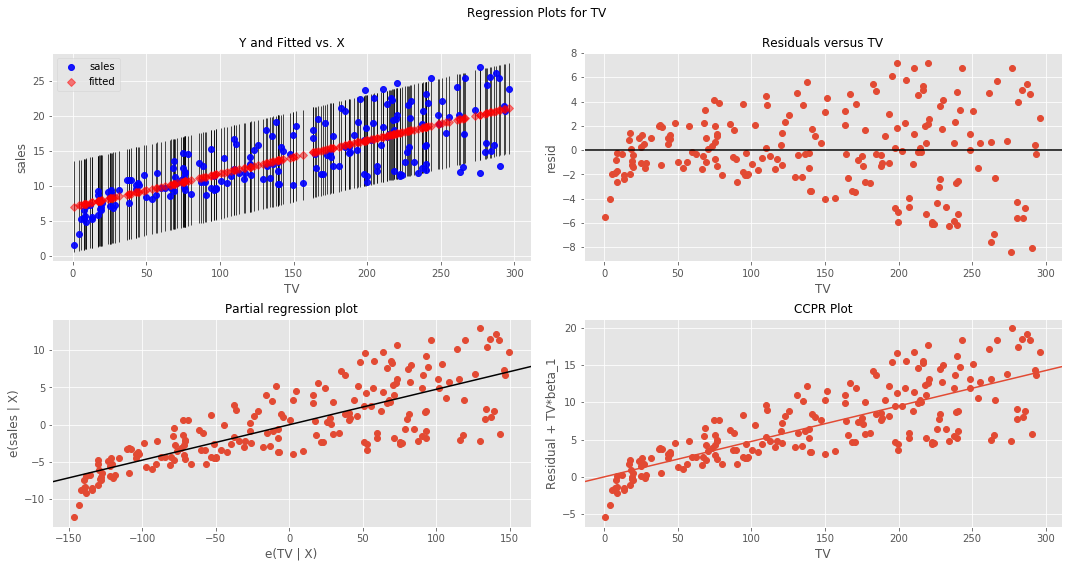

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

/Users/evanokin/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


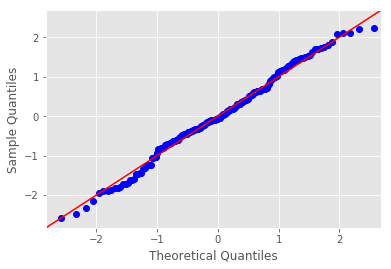

In [23]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [27]:
model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64